===========iteration:0===========
SGD:2.338820156402245
Momentum:2.2910347658912285
AdaGrad:2.419447670880513
Adam:2.3572259314530477
===========iteration:100===========
SGD:1.413105663669692
Momentum:0.510225416918167
AdaGrad:0.15539496818245327
Adam:0.3432672867248097
===========iteration:200===========
SGD:0.5960542701301668
Momentum:0.22131496771977133
AdaGrad:0.07997769386587557
Adam:0.12379210146498097
===========iteration:300===========
SGD:0.33814339906880236
Momentum:0.147916426215299
AdaGrad:0.11340340036898983
Adam:0.08683927112166973
===========iteration:400===========
SGD:0.43194329260197717
Momentum:0.19555679792595287
AdaGrad:0.12044243282769311
Adam:0.1336527480057618
===========iteration:500===========
SGD:0.31345646862336246
Momentum:0.10629982275036917
AdaGrad:0.032727649330404174
Adam:0.06074661116262994
===========iteration:600===========
SGD:0.31499177875966544
Momentum:0.14240817302615266
AdaGrad:0.06984813208258421
Adam:0.07720190696436371
===========iteration:7

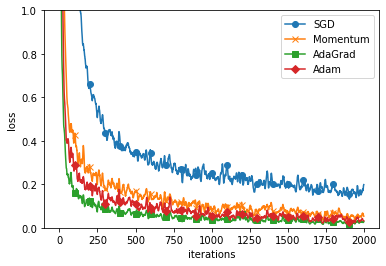

In [1]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

===========iteration:0===========
SGD:2.4437035584655664
Momentum:2.425190510715167
AdaGrad:2.1855079059497573
Adam:2.233175644074236
===========iteration:100===========
SGD:1.8919342162443125
Momentum:0.33315933574651657
AdaGrad:0.23985171238824798
Adam:0.3656910480869294
===========iteration:200===========
SGD:1.0504940504199614
Momentum:0.30226573598182127
AdaGrad:0.23756796760827745
Adam:0.2859482897961614
===========iteration:300===========
SGD:0.5713915783899033
Momentum:0.13792293901971314
AdaGrad:0.161452127621169
Adam:0.12350175639350504
===========iteration:400===========
SGD:0.5299063098756136
Momentum:0.2811917885250369
AdaGrad:0.22940469428299715
Adam:0.2349965617618693
===========iteration:500===========
SGD:0.33691085440795515
Momentum:0.14916593706080364
AdaGrad:0.12361254773506732
Adam:0.14482708261693233
===========iteration:600===========
SGD:0.2573654870451534
Momentum:0.12661013178879293
AdaGrad:0.11811758748093276
Adam:0.15316048967783702
===========iteration:700=

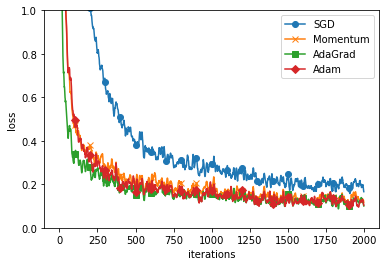

In [2]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[20, 30, 40, 50, 60, 70],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

===========iteration:0===========
SGD:2.2997630540033898
Momentum:2.231018087946942
AdaGrad:13.851488435979803
Adam:1.9347211778609612


KeyboardInterrupt: 